<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/Algoritmo_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604

* Adicionar nos campo as vendas dos últimos 3 meses (os primeiros meses fica sem preencher e dps joga a média do mês nos campos)

In [14]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date, format='%d-%m-%Y')
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df


In [15]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo PreparaçãoDeDados.ipynb

def PreparaDados(df):
  target = 'Weekly_Sales'

  filtro_treino = df["Year_2012"] == 0
  filtro_teste = df["Year_2012"] == 1

  train = df.where(filtro_treino).dropna()
  test =  df.where(filtro_teste).dropna()

  y_train = train[target].array
  X_train = train.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)
  

  y_test = test[target].array
  X_test = test.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)

  X_train.reset_index(drop=True,inplace=True)

  return X_train, X_test, y_train, y_test

In [16]:
df = pd.read_csv('./Walmart.csv')
df = TratarDadosBaseWalmart(df)

X_train, X_test, y_train, y_test = PreparaDados(df)

In [17]:
print('Base original  ---> ',df.shape,df.shape,'\nBase de Treino  ---> ',X_train.shape,y_train.shape,'\nBase de teste   ---> ', X_test.shape,'', y_test.shape)

Base original  --->  (6435, 67) (6435, 67) 
Base de Treino  --->  (4500, 63) (4500,) 
Base de teste   --->  (1935, 63)  (1935,)


In [18]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr.score(X_train, y_train)
predictions = mlr.predict(X_test)

In [20]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(0.9631413107836966, 72281.3010378403, 103003.4150553883)

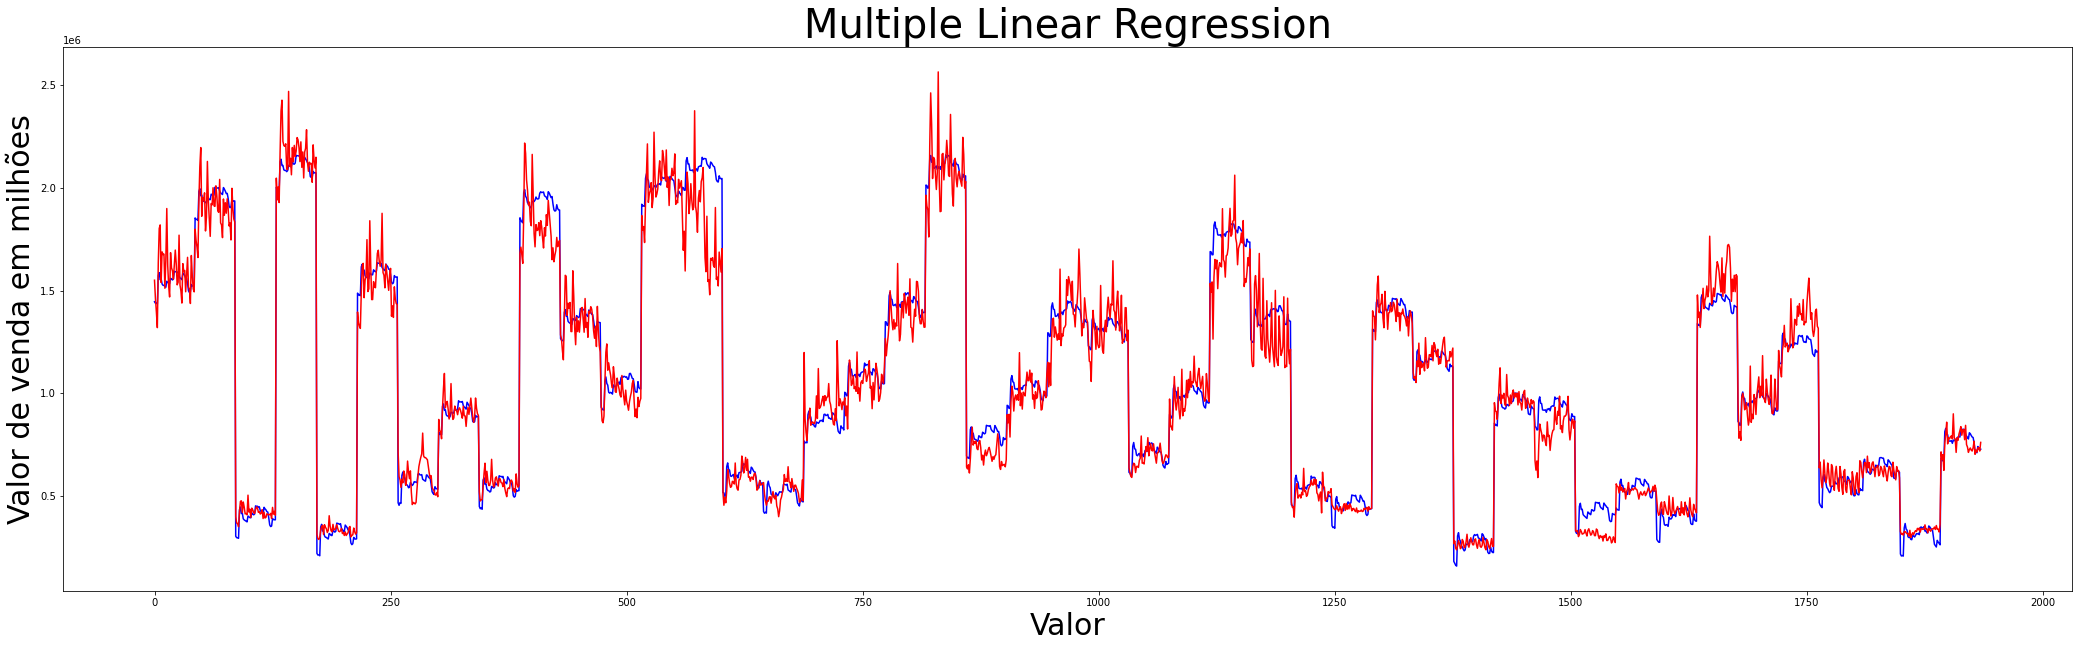

In [21]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(y_test, 'r')
plt.title("Multiple Linear Regression", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()

In [99]:
dt = DecisionTreeRegressor(random_state=0, min_samples_leaf=10, max_depth = 44)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(0.9500242862038608, 83486.31466907678, 119939.20986881803)

In [104]:
for i, feature in enumerate(dt.feature_names_in_):
  print("Feature {}: {}".format(feature, dt.feature_importances_[i]))


Feature Holiday_Flag: 0.001154550377982395
Feature Temperature: 0.005718994063864625
Feature Fuel_Price: 0.001463658488478825
Feature CPI: 0.05066245799023413
Feature Unemployment: 0.0006359575292891189
Feature Day: 0.008392221768691458
Feature Month_1: 0.00012007588220352489
Feature Month_2: 2.5384182009056192e-05
Feature Month_3: 0.0
Feature Month_4: 7.805479399767224e-05
Feature Month_5: 6.640912620467001e-05
Feature Month_6: 0.0
Feature Month_7: 0.0
Feature Month_8: 0.0
Feature Month_9: 3.6588770568066735e-05
Feature Month_10: 0.0
Feature Month_11: 0.0
Feature Month_12: 0.027237375774413413
Feature Store_1: 0.0338068268244546
Feature Store_2: 0.07037581532761304
Feature Store_3: 0.0
Feature Store_4: 0.08195640582934671
Feature Store_5: 0.0014970622968040876
Feature Store_6: 0.03514156811783343
Feature Store_7: 4.5889578720263464e-05
Feature Store_8: 0.010100798593005871
Feature Store_9: 0.0005669073938850649
Feature Store_10: 0.07325935493517939
Feature Store_11: 0.0270815737576694

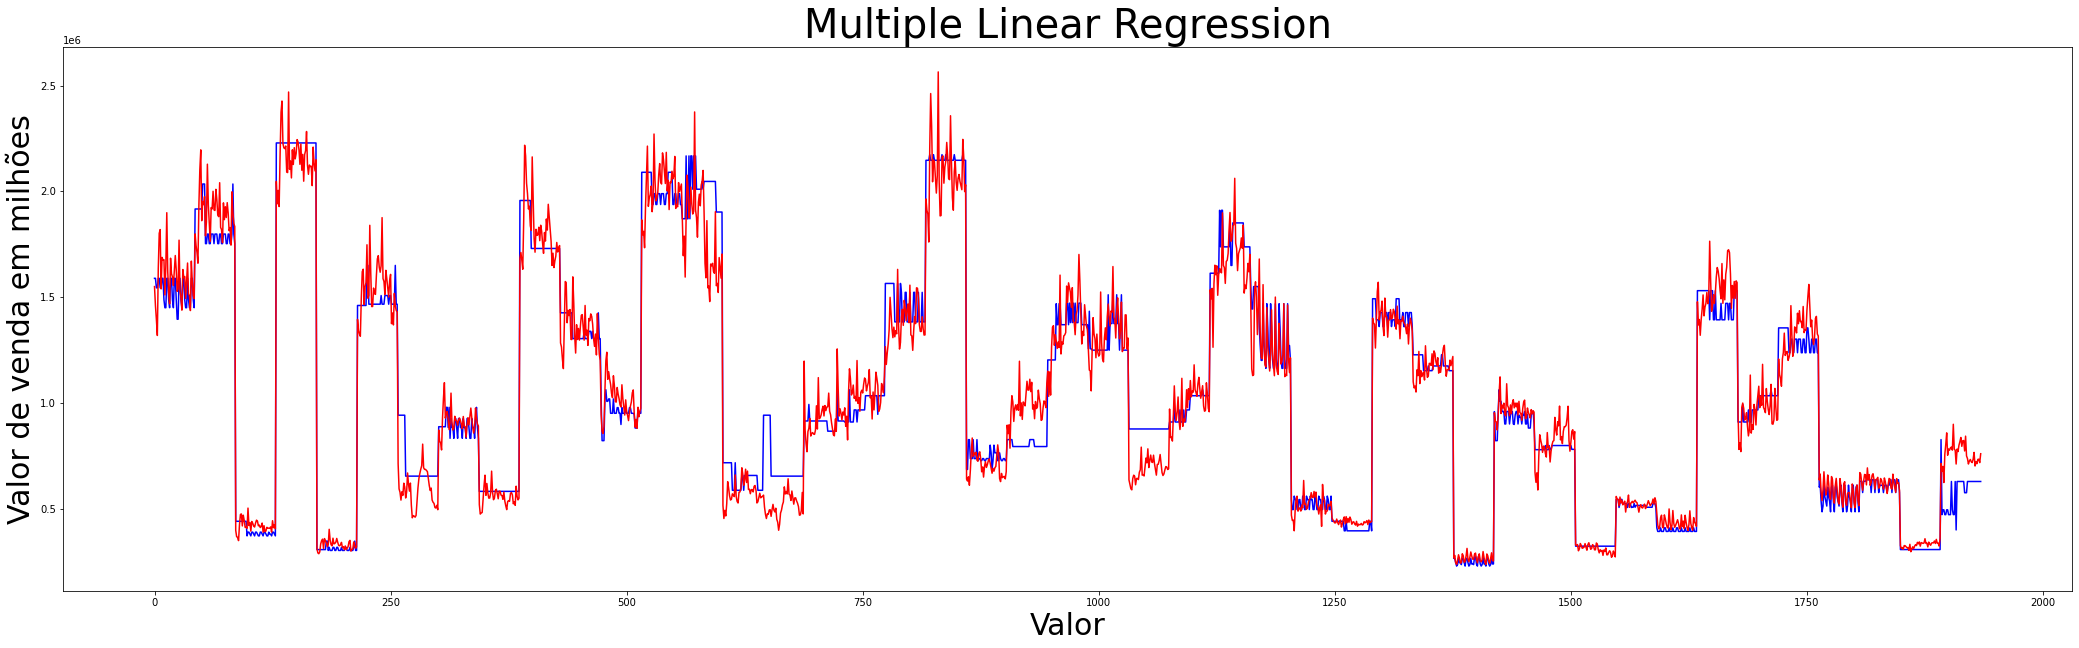

In [41]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(y_test, 'r')
plt.title("Multiple Linear Regression", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()